In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve
)
import matplotlib.pyplot as plt


data = "/Users/katakitaeva/Desktop/DPO/Grib/homeworks/HW05/S05-hw-dataset.csv" 
df = pd.read_csv(data)

In [11]:
display(df.head())

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [14]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [24]:
# распределение целевого признака default (например, через value_counts(normalize=True)).

print("Распределение (количество и доля):")
counts = df['default'].value_counts()
proportions = df['default'].value_counts(normalize=True)
print("Количество:")
print(counts)
print("\nДоли (проценты):")
print((proportions * 100).round(1).astype(str) + "%")

Распределение (количество и доля):
Количество:
default
0    1769
1    1231
Name: count, dtype: int64

Доли (проценты):
default
0    59.0%
1    41.0%
Name: proportion, dtype: object


In [31]:
#negative_cols = []
print("проверка MIN/MAX:")
for col in numeric_cols[:10]:  # первые 10 колонок
    print(f"{col:20} min={df[col].min():8.2f} max={df[col].max():8.2f}")

проверка MIN/MAX:
client_id            min=    1.00 max= 3000.00
age                  min=   21.00 max=   69.00
income               min=15000.00 max=156351.00
years_employed       min=    0.00 max=   39.00
credit_score         min=  402.00 max=  850.00
debt_to_income       min=    0.01 max=    0.88
num_credit_cards     min=    0.00 max=    7.00
num_late_payments    min=    0.00 max=   14.00
has_mortgage         min=    0.00 max=    1.00
has_car_loan         min=    0.00 max=    1.00


Кратко (несколько предложений) зафиксировать наблюдения:

сколько объектов и признаков в датасете;
есть ли явные аномалии (например, явно невозможные значения);
как распределён таргет (баланс классов).


В таблице 3000 строк и 17 колонок, две из которых содержат значения float64 и пятнадцать - int64.
59.0% значений столбца "default" = 0, 41.0% = 1. Явных аномалий не обнаружено (все максимальные и минимальные значения в рамках адекватного).

In [9]:
# Выделить матрицу признаков X и вектор таргета y:
# таргет – столбец default;
# в качестве признаков использовать все остальные осмысленные столбцы (кроме client_id, который можно удалить или не использовать в X).

# copy(): Чтобы изменения в x и y не влияли на оригинальную таблицу df

y = df['default'].copy() # вектор таргета
X = df.drop(columns=['default', 'client_id']) # удаляем из таблицы ненужные столбцы
print(f"\n Используемые признаки ({len(X.columns)} шт.):") # показываем, какие колонки остались в X
for i, col in enumerate(X.columns, 1):
    dtype = str(X[col].dtype)
    print(f"  {i:2d}. {col:<25} [{dtype}]")


 Используемые признаки (15 шт.):
   1. age                       [int64]
   2. income                    [int64]
   3. years_employed            [int64]
   4. credit_score              [int64]
   5. debt_to_income            [float64]
   6. num_credit_cards          [int64]
   7. num_late_payments         [int64]
   8. has_mortgage              [int64]
   9. has_car_loan              [int64]
  10. savings_balance           [int64]
  11. checking_balance          [int64]
  12. region_risk_score         [float64]
  13. phone_calls_to_support_last_3m [int64]
  14. active_loans              [int64]
  15. customer_tenure_years     [int64]


--- Все значения числовые :) 👍🏻

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)
y_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Accuracy: {accuracy_baseline:.4f} ({accuracy_baseline:.1%})")

# ROC-AUC
try:
    roc_auc_baseline = roc_auc_score(y_test, y_proba_baseline)
    print(f"ROC-AUC: {roc_auc_baseline:.4f}")
except ValueError as e:
    print(f"ROC-AUC не рассчитан: {e}")

most_frequent_class = y_train.value_counts().index[0]
most_frequent_ratio = y_train.value_counts(normalize=True).iloc[0]
print(f"Модель предсказывает: {most_frequent_class} ({most_frequent_ratio:.1%} данных)")

Accuracy: 0.5893 (58.9%)
ROC-AUC: 0.5000
Модель предсказывает: 0 (59.0% данных)


Бейзлайн показывает минимальный уровень качества, который нужно превзойти, чтобы модель имела практическую ценность.
Точка отсчёта нужна, чтобы понять, есть ли смысл в сложной ML-модели.
Если модель работает хуже, чем простое правило "всегда предсказывать самый частый класс", значит она бесполезна. 

Лучшие параметры: {'logreg__C': 1.0, 'logreg__solver': 'lbfgs'}
Test Accuracy: 0.7933
Test ROC-AUC: 0.8647


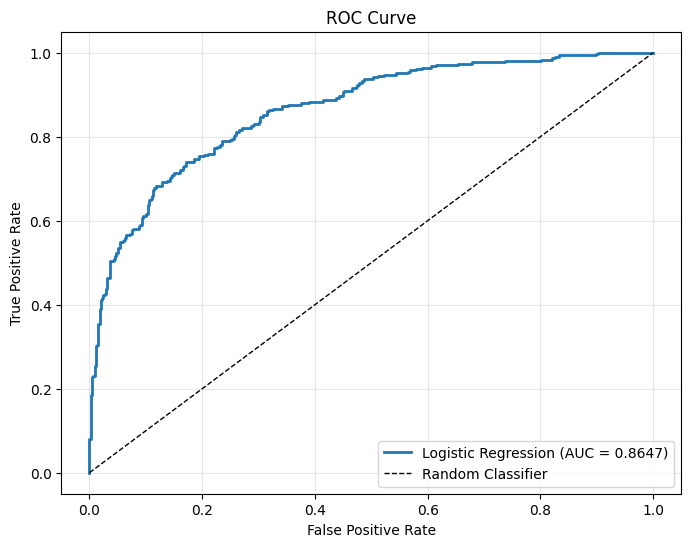

In [12]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Параметры для подбора
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__solver': ['lbfgs', 'liblinear']
}

# Поиск лучших параметров
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Оценка лучшей модели
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC-AUC: {roc_auc:.4f}")

# 6. ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
acc_dummy = accuracy_score(y_test, dummy.predict(X_test))
auc_dummy = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])

print(pd.DataFrame({
    'Model': ['Dummy', 'LogReg'],
    'Accuracy': [acc_dummy, accuracy],
    'ROC-AUC': [auc_dummy, roc_auc]
}))k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
acc_dummy = accuracy_score(y_test, dummy.predict(X_test))
auc_dummy = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])

print(pd.DataFrame({
    'Model': ['Dummy', 'LogReg'],
    'Accuracy': [acc_dummy, accuracy],
    'ROC-AUC': [auc_dummy, roc_auc]
}))

    Model  Accuracy   ROC-AUC
0   Dummy  0.538667  0.476332
1  LogReg  0.793333  0.864709


    Логистическая регрессия значительно превзошла бейзлайн-модель DummyClassifier по обеим ключевым метрикам. Точность (accuracy) выросла с 53.9% до 79.3%, что означает прирост правильных предсказаний на 25.4%. Значительный рост наблюдается и в ROC-AUC (уровень случайного угадывания) с 0.476 до 0.865, что демонстрирует способность модели уверенно разделять классы. Такое улучшение ROC-AUC указывает на то, что логистическая регрессия не просто чаще угадывает, а действительно выявляет закономерности в данных.
    Для данной задачи предсказания оттока клиентов логистическая регрессия представляет собой разумный базовый выбор. Она существенно лучше случайного классификатора, достаточно проста для интерпретации и показывает стабильное качество. Однако для дальнейшего улучшения результатов стоит рассмотреть более сложные алгоритмы и более детальную feature engineering-обработку признаков.